# <font color='green'><b> Open, show and convert images </b></font>

### Credits: Hands-on Image Processing with Python, Chapter 1 - Author: Sandipan Dey

## <font color='green'><b>Base Dir setup</b></font>

In [1]:
#@title ▶️ Base dir setup
import os, sys

# check if hosted (Google VM) or running on local server
if 'google.colab' in sys.modules:
  #@markdown Google Drive root folder - hosted by Google VM (adapt to your local paths)
  from google.colab import drive
  drive.mount('/content/drive', force_remount=False)
  base_dir = 'CV/' #@param {type: "string"}
  base_dir  = os.path.join('/content/drive/MyDrive/', base_dir)
  #MODIFY THESE PATHS TO POINT TO YOUR IMAGES
  img_dir = 'data/img/'
  vid_dir = 'data/video/'
  out_dir = 'output/'
  
  # move to base_dir 
  os.chdir(base_dir)
else:
  #MODIFY THESE PATHS TO POINT TO YOUR IMAGES
  img_dir = '../data/img/'
  out_dir = '../data/output/'
 

print("Current dir:", os.getcwd())

Current dir: /Users/raffaella/Library/CloudStorage/OneDrive-UniversitàdegliStudidiMilano/Raffaella Unimi/materiale didattica/Visione Artificiale/Visione-Artificiale-2023-24/PARTE I/Labs/Lab02_Color_IP


### <font color='green'><b>Import libraries</b></font>

### TUTORIALS: 
- opencv:  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
- pillow: https://pillow.readthedocs.io/en/stable/
- skimage: https://scikit-image.org/docs/stable/
- matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
- numpy: https://numpy.org/devdocs/user/quickstart.html
- os: https://www.tutorialsteacher.com/python/os-module
- plotly: https://plotly.com/python/getting-started/
 

In [2]:
import cv2
import numpy as np

img_dir = '../data/img/'
out_dir = '../data/output/'

## <font color='green'><b> 1 - Reading saving and displaying images </b></font>



### 1.1  using *MATPLOTLIB* 



- Observe: 
    - values are float (in the range [0,1])
    - the image is a numpy array
    - visualization is local


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt

im = mpimg.imread(img_dir + "hill.jpg") # read the image from disk as a numpy ndarray

print("- Img shape: " + str(im.shape)) # this image contains an α channel, hence num_channels= 4
print("- Data type: " + str(im.dtype))
print("- Img type: " + str(type(im))) 
print("- Range of values: [" + str(np.min(im)) + ", "+ str(np.max(im)) + "]")

plt.figure(figsize=(7,7))
plt.imshow(im) # display the image
plt.axis('off')
plt.title('My favourite mountain')
plt.show()

 

### 1.2 using *PIL*</b></font>



- Observe: 
    - values are unit8 (in the range [0,255])
    - the opened image is an object
    - visualization with the function `show` open an external window


In [ ]:
from PIL import Image 
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

im = Image.open(img_dir + "parrot.png") # read the image, provide the correct path
print("- Range of values: [" + str(np.min(im)) + ", "+ str(np.max(im)) + "]")
print("- Img shape : (" + str(im.width) + "," + str(im.height) + ")" )
print("- Img color space : " + str(im.mode))
print("- Img format : " + str(im.format))
print("- Img type : " + str(type(im)))

#im.show()
display(im) #f. built-in python


#### - PIL offers several funtions to process the images, for examples...

In [ ]:
#RGB TO gray:

im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save(out_dir + 'parrot_gray.png') # save the image to disk
im_read = Image.open(out_dir + 'parrot_gray.png') # # read the grayscale image from disk 

#im_read.show()
display(im_read) #f. built-in python

In [ ]:
# EXTRACTION OF THE CHANNELS

ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B

# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.gray()
plt.subplot(1,3,1); plt.imshow(ch_r); plt.title('Red Channel'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g );plt.title('Green Channel'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b); plt.title('Blue Channel'); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

##### <font color='gray'><b>- EXERCISE 1: </b></font>

 In order to help the output interpretation, you could show the three channels using a color map with the chromatic semantic.

Hint: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
#TO DO EX 1
 
 
 
 






In [ ]:
# SOLUTION EX 1:

# EXTRACTION OF THE CHANNELS
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B

# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

## <font color='green'><b> 1.3  using *SCIKIT-IMAGE* *** </b></font>

- Observe: 
    - values are uint8 (in the range [0,255])
    - the image is a numpy array
    - visualization is local

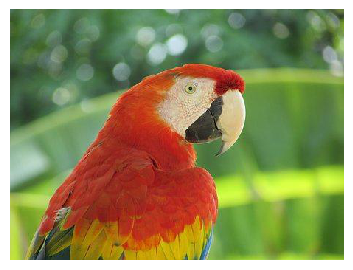

In [4]:
import skimage 
import matplotlib.pylab as plt
 
im = skimage.io.imread(img_dir + "parrot.png")
plt.figure(figsize=(4,4))
skimage.io.imshow(im)
plt.axis('off');

- Range of values: [0, 255]
- Img shape : ((340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>


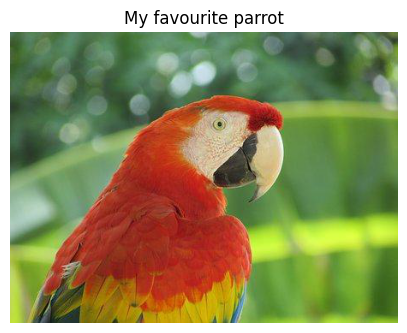

In [5]:
from skimage.io import imread, imsave, imshow #, imread_collection, imshow_collection
from skimage import color,  exposure, img_as_float, data  
import matplotlib.pylab as plt
 
im = imread(img_dir + "parrot.png") # read image from disk, provide the correct path
print("- Range of values: [" + str(np.min(im)) + ", "+ str(np.max(im)) + "]")
print("- Img shape : (" + str(im.shape))
print("- Data type format : " + str(im.dtype))
print("- Img type : " + str(type(im)))

#imshow(im)

plt.figure(figsize=(5,5))
plt.imshow(im) # display the image
plt.axis('off')
plt.title('My favourite parrot')
plt.show()


- You can refer to built-in images such as  scikit-image's astronaut image (and others) 

In [ ]:
im = data.astronaut()
imshow(im)

## <font color='green'><b>  1.4 using *OPENCV* <b></font>

- Observe: 
  - values are uint8 (in the range [0,255])
  - the image is a numpy array
  - color channels are organized as BGR 

- Range of values: [0, 255]
- Img shape : ((340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>


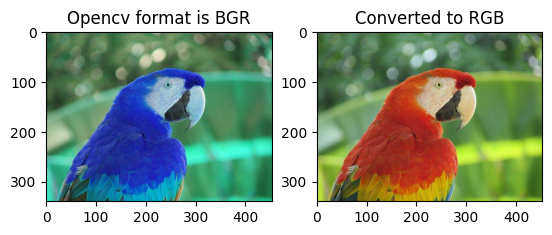

In [6]:
import cv2

im = cv2.imread(img_dir + 'parrot.png')

print("- Range of values: [" + str(np.min(im)) + ", "+ str(np.max(im)) + "]")
print("- Img shape : (" + str(im.shape))
print("- Data type format : " + str(im.dtype))
print("- Img type : " + str(type(im)))

plt.subplot(1,2,1)
plt.title("Opencv format is BGR")
plt.imshow(im)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.title("Converted to RGB")
plt.imshow(im)
 

## <font color='green'><b>  1.5 using *PLOTLY*  for interactive visualization <b></font>


In [7]:
import plotly.express as px   

px.imshow(im)

#  2 - Convertion among different data structures


### 2.1 PIL => numpy [0,255] uint8,  using `np.array`


In [ ]:
im = Image.open( img_dir + 'flowers.png') # read image into an Image object with PIL
 
im = np.array(im) # create a numpy ndarray from the Image object
print("Range of values: [" + str(np.min(im)) + ", "+ str(np.max(im)) + "]")
print(im.shape, im.dtype, type(im))

plt.imshow(im) # or use skimage imshow to display the image 
plt.axis('off') 


### 2.2 numpy uint8 [0,255]  (skimage, opencv) ==> PIL object, using `Image.fromarray()`

In [ ]:
im = imread(img_dir + 'flowers.png') # read image into numpy ndarray with skimage
im = Image.fromarray(im) # create a PIL Image object from the numpy ndarray

print("Range of values: [" + str(np.min(im)) + ", "+ str(np.max(im)) + "]")
print(im.width, im.height, im.mode, im.format, type(im))

#im.show() # display the image with PIL opening an external window. Image.show() method
plt.imshow(im)
 

### 2.3 numpy float [0,1] (matplotlib ) ==> PIL object using, `Image.fromarray()`

In [ ]:
im = mpimg.imread(img_dir + "hill.jpg") # read the image from disk as a numpy ndarray

im_np = Image.fromarray(np.uint8(im*255))
 
print("Range of values: [" + str(np.min(im_np)) + ", "+ str(np.max(im_np)) + "]")
print(im_np.width, im_np.height, im_np.mode, im_np.format, type(im_np))

plt.imshow(im) # display the image with PIL Image.show() method



# <font color='green'><b> 3 - Convertion among data type</b></font>

- If you need a particular dtype, skimage provides utility functions that convert dtypes and properly rescale image intensities: https://scikit-image.org/docs/stable/user_guide/data_types.html

In [8]:
from skimage import img_as_float, img_as_ubyte

## <font color='green'><b> 3.1 Convert images uint8 to float using `img_as_float`<b></font>

In [9]:
#uint8 => float

#TOY EXAMPLE:
image = np.arange(0, 50, 10, dtype=np.uint8)
print("Original uint8 values: " + str(image))
print("By hand they are not scaled: " + str(image.astype(float))) # These float values are out of range.
print("using the funtion 'img_as_float':" + str(img_as_float(image))) #range 0-1



Original uint8 values: [ 0 10 20 30 40]
By hand they are not scaled: [ 0. 10. 20. 30. 40.]
using the funtion 'img_as_float':[0.         0.03921569 0.07843137 0.11764706 0.15686275]


In [10]:
im = imread(img_dir + "hill.jpg") # read the image from disk as a numpy ndarray
print("The original image is " + str(im.dtype) + ", Range: [" + str(im.min()) + ", " + str(im.max()) + "]" )

#float to uint8
im = img_as_float(im) 
print("The converted image is " + str(im.dtype)+ ", Range: [" + str(im.min()) + ", " + str(im.max()) + "]" )


The original image is uint8, Range: [0, 255]
The converted image is float64, Range: [0.0, 1.0]


## <font color='green'><b>  3.2 Convert images from float to uint8 using `img_as_ubyte` <b></font>


In [11]:
#float => uint8

#TOY EXAMPLE:

image = np.arange(.0, .50, .10, dtype=float)
print("Original uint8 values: " + str(image))
print("By hand they are not scaled: " + str(image.astype(np.uint8))) # These float values are out of range.
print("using the funtion 'img_as_ubyte':" + str(img_as_ubyte(image))) #range 0-1


Original uint8 values: [0.  0.1 0.2 0.3 0.4]
By hand they are not scaled: [0 0 0 0 0]
using the funtion 'img_as_ubyte':[  0  26  51  77 102]


In [13]:
im = imread(img_dir + "/hill.jpg") # read the image from disk as a numpy ndarray
print("The original image is " + str(im.dtype) + ", Range: [" + str(im.min()) + ", " + str(im.max()) + "]" )

#float to uint8
im = img_as_ubyte(im) 
print("The converted image is " + str(im.dtype)+ ", Range: [" + str(im.min()) + ", " + str(im.max()) + "]" )


The original image is uint8, Range: [0, 255]
The converted image is uint8, Range: [0, 255]


# <font color='green'><b> 4 - Convertion among file format </b></font>



### - Save a png image (e.g. parrot.png) in jpeg using the skimage library

In [15]:
from skimage.io import imread, imsave

im =  imread(img_dir + "parrot.png") # read image from disk, provide the correct path
imsave(out_dir + "parrot.jpg", im)

### <font color='green'><b> EXERCISE 2 </b></font>
- Save a png image RGBA (e.g. hill_dark.png) in jpeg using the skimage library
    - there might be an error
    - try to solve it

In [ ]:
#TO DO EX 2









In [16]:
#SOLUTION EX 2:

from skimage.io import imread, imsave

im =  imread(img_dir + "hill_dark.png") # read image from disk, provide the correct path
im_s = im.shape
print(im_s)

if im_s[2]==4:
    imsave(out_dir + "hill.jpg", im[:,:, 1:4])
else:
    imsave(out_dir + "hill.jpg", im)

(288, 432, 4)


# <font color='green'><b> 5 - Access to the image content </b></font>


###  5.1 Separating the RGB channels of an image with the PIL function `split()`

In [ ]:
im = Image.open(img_dir + "parrot.png")
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B

### 5.2 Recombine multiple channels of an image  with the PIL function `merge()`


In [ ]:
im = Image.merge('RGB', (ch_g, ch_b, ch_r)) # swap the red and blue channels obtained last time with split()
plt.imshow(im)
plt.title("Something wrong???")

## <font color='green'><b> 5.3 Access to one pixel in numpy <b></font>

In [18]:
img = imread(img_dir + "parrot.png")
#One pixel: 
print( "pixel value at (x,y,c)=(100,100,1) before changing: "+ str(img[100,100,1]))  
img[100,100,1] = 0
print( "pixel value at (x,y,c)=(100,100,1) after changing: "+ str(img[100,100,1]))


pixel value at (x,y,c)=(100,100,1) before changing: 124
pixel value at (x,y,c)=(100,100,1) after changing: 0


## <font color='green'><b> 5.4 Access to a layer in numpy <b></font>


Image shape is (H x W x nChannels).
the selection "I[:,:,c]" allows to access to the channel "c" 

Dimension of the layer: (340, 453, 3)


<Figure size 640x480 with 0 Axes>

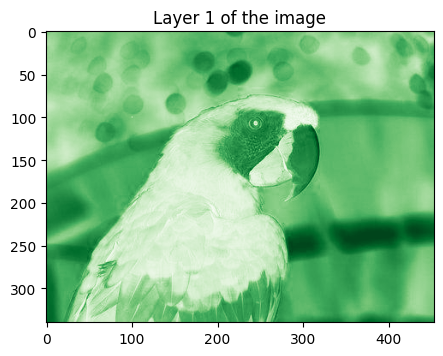

<Figure size 640x480 with 0 Axes>

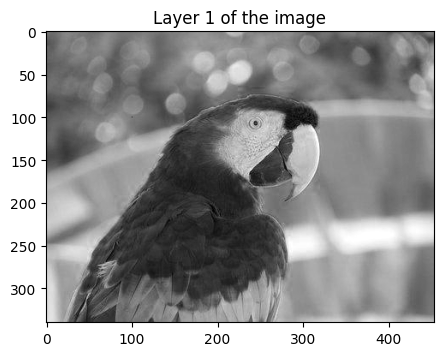

In [19]:
#One layer:
layer1 = img[:,:,1]
print("Dimension of the layer: "+ str(img.shape))

fig = plt.figure()
plt.figure(figsize=(5,5))
plt.title("Layer 1 of the image")
plt.imshow(layer1, cmap='Greens')


fig = plt.figure()
plt.figure(figsize=(5,5))
plt.title("Layer 1 of the image")
plt.imshow(layer1, cmap='gray')


## <font color='green'><b> 5.5  Access to a portion in numpy<b></font>

In [20]:
part = img[50:200,  200:350, :]
part.shape
px.imshow(part)

## <font color='green'><b> 5.6 Conditioned access: make darker pixel look black <b></font>

### <font color='green'><b>- EXERCISE 2: </b></font>

-  Given an RGB image, set to 1 those pixels having R value > 128, and to 0 the others 

In [ ]:
#TO DO EX 2








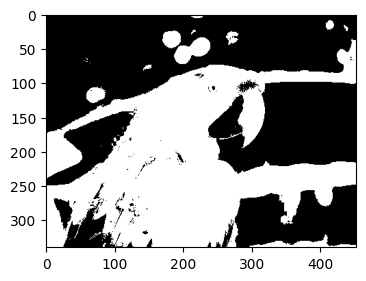

In [21]:
#SOLUTON EX 2

im = imread(img_dir + "parrot.png")
h, w, _ = im.shape
R = im[:,:,0]
out = np.zeros((h,w))

out[R>128]=1
 
plt.figure(figsize=(4,4))
plt.imshow(out, cmap = 'gray')


# <font color='green'><b> 6 - Color space conversions </b></font>


### <font color='gray'><b> 6.1 using *opencv*  </b></font>



####  *- Convert RGB to other color space*

There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two which are most widely used ones, BGR <-> Gray and BGR <-> HSV.

For color conversion, we use the function `cv2.cvtColor(input_image, flag)` where flag determines the type of conversion.

For RGB -> Gray conversion we use the flags `cv2.COLOR_RGB2GRAY`. Similarly for BGR -> HSV, we use the flag `cv2.COLOR_RGB2HSV`. To get other flags, just run following commands in your Python terminal

In [ ]:
#all possible conversions
flags = [i for i in dir(cv2) if i.startswith('COLOR_RGB')]
print(flags)

greyImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
 # show image
plt.figure(figsize=(6,6))
plt.imshow(greyImg, cmap='gray', vmin=0, vmax=255)
plt.show()

**Convertion to HSV:**

For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

In [ ]:
hsvImg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h = hsvImg[:,:,0]
plt.figure(figsize=(6,6))
plt.imshow(h, cmap='gray', vmin=0, vmax=179)
plt.title("Hue visualization using the gray cmap")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(h, cmap='hsv') #Using Cycling colormap (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
plt.title("Hue visualization using the hsw cmap")
plt.show()


## <font color='green'><b>6.2 using  scikit-image  </b></font>


https://scikit-image.org/docs/dev/api/skimage.color.html

- RGB to GRAY

<class 'numpy.ndarray'> (340, 453, 3)
<class 'numpy.ndarray'> float64 (340, 453)
<class 'numpy.ndarray'> float64 (340, 453)


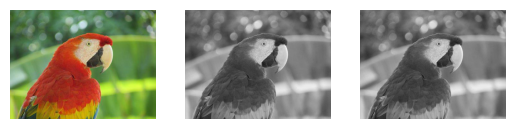

In [22]:
#CONVERT TO GRAY

im = imread(img_dir + "parrot.png")
print(type(im), im.shape)


#TO TRANSFORM IN GRAY 2 alternatives:
#1.
im_g1= imread(img_dir + "parrot.png", as_gray=True)
print(type(im_g1), im_g1.dtype, im_g1.shape)

#2.
im_g2 = color.rgb2gray(im)
print(type(im_g2), im_g2.dtype, im_g2.shape)
plt.subplot(131), plt.imshow(im ), plt.axis('off')
plt.subplot(132), plt.imshow(im_g1, cmap='gray'), plt.axis('off')
plt.subplot(133), plt.imshow(im_g2, cmap='gray'), plt.axis('off')
plt.show()

- RGB to HSV (and vice versa)

In [ ]:
#CONVERT TO HSV

hsv = color.rgb2hsv(im) # from RGB to HSV color space

plt.gray() #changes the default colormap 
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(im), plt.title('original')
plt.axis('off')
plt.subplot(222), plt.imshow(hsv[...,0], cmap='hsv'), plt.title('h', size=20),
plt.axis('off')
plt.subplot(223), plt.imshow(hsv[...,1] ), plt.title('s', size=20),
plt.axis('off')
plt.subplot(224), plt.imshow(hsv[...,2] ), plt.title('v', size=20),
plt.axis('off')
plt.show()

im1 = color.hsv2rgb(hsv) # from HSV back to RGB
plt.title('reconstructed ', size=20), plt.axis('off'), imshow(im1) 

### <font color='green'><b>- EXERCISE 3: </b></font>

Given the image in the hsv color space, change the layer of saturation to different values, an then reconstruct and visualize the corresponding RGB. Does it make sense to you what you see? Do the same for the Hue and Value channels.

In [ ]:
#TO DO EX 3








In [ ]:
#SOLUTUON EX 3

hsv = color.rgb2hsv(im) # from RGB to HSV color space
hsv[:, :,1] = 0.5 # change the saturation
im1 = color.hsv2rgb(hsv) # from HSV back to RGB
plt.title('reconstructed with changed values', size=20), plt.axis('off'), imshow(im1) 

### <font color='green'><b>- EXERCISE 4: </b></font>

### Convert the image "im" in CIELab and show the single layers separately using the subplot function of matplotlib 


In [ ]:
#TO DO EX 4






In [ ]:
# SOLUTION EX 4
# CONVERT TO CIE-Lab

Lab = color.rgb2lab(im)
print(type(Lab), Lab.shape)

plt.gray()

# SHOW USING SUBPLOT:
plt.subplot(1,3,1)
plt.imshow(Lab[:,:,0])
plt.title('L')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Lab[:,:,1])
plt.title('a')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(Lab[:,:,2])
plt.title('b')
plt.axis('off')
plt.show()


# OR, MORE COMPACTLY: 
 
for ind, layer in  enumerate(['L',  'a', 'b']):
    plt.subplot(1,3,ind+1)    
    plt.title(layer)
    plt.imshow(Lab[:,:,ind])
    plt.axis('off')

  

## 6.3 using *PIL*



- RGB to GRAY

In [ ]:
from PIL import Image, ImageCms

im = Image.open(img_dir + "parrot.png")
gray = im.convert('L')
plt.imshow(gray)

- any to RGB

In [ ]:
im = Image.open(img_dir + "hill.png")
print(im.mode)
im = im.convert("RGB")
print(im.mode)


- among “LAB”, “XYZ”, and “sRGB”

In [ ]:
if im.mode != "RGB":
  im = im.convert("RGB")

srgb_profile = ImageCms.createProfile("sRGB")
lab_profile  = ImageCms.createProfile("LAB")

rgb2lab_transform = ImageCms.buildTransformFromOpenProfiles(srgb_profile, lab_profile, "RGB", "LAB")
lab_im = ImageCms.applyTransform(im, rgb2lab_transform)


print(lab_im.width, lab_im.height, lab_im.mode, lab_im.format, type(lab_im))


ch_L, ch_a, ch_b = lab_im.split() # split the RGB image into 3 channels: R, G and B

# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.gray()
plt.subplot(1,3,1); plt.title('L', size=20); plt.imshow(ch_L); plt.axis('off')
plt.subplot(1,3,2); plt.title('a', size=20); plt.imshow(ch_a); plt.axis('off')
plt.subplot(1,3,3); plt.title('b', size=20); plt.imshow(ch_b ); plt.axis('off')
plt.tight_layout()
plt.show()  

#  7 - Operations on pairs of images 


### 7.1 Adding two images  


In [ ]:
from PIL.ImageChops import subtract, multiply, screen, difference, add

im1 = Image.open(img_dir + "parrot.png")
im2 = Image.open(img_dir + "hill.png").convert('RGB').resize((im1.width, im1.height))
plt.imshow(add(im1, im2))

## 7.2 Multiplying two images

In [ ]:

plt.imshow(multiply(im1, im2))

## 7.3 Computing the difference between two images 


In [ ]:
im1 = Image.open(img_dir + "goal1.png") # load two consecutive frame images from the video
im2 = Image.open(img_dir +"goal2.png")
im = difference(im1, im2)
plt.figure(figsize=(20,25))
im.save(out_dir + "goal_diff.png")
plt.subplot(311)
plt.imshow(im1)
plt.axis('off')
plt.subplot(312)
plt.imshow(im2)
plt.axis('off')
plt.subplot(313)
plt.imshow(im), plt.axis('off')
plt.show()